# Notebook for Data presentations

### Load and Config Packages

In [117]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import itertools
from mpl_toolkits.mplot3d import axes3d
import matplotlib.cm as cm  

#%matplotlib qt

## Group Structure

Group data needed for post-processing:

In [118]:
R = np.array([[0, -1],[1, 0]])
M = np.array([[1, 0],[0, -1]])
G = np.zeros([2,2,8])
G[:,:,0] = np.eye(2) # The D_4 group [via it's faithful 2d rep]
G[:,:,1] = R
G[:,:,2] = R@R
G[:,:,3] = R@R@R
G[:,:,4] = M
G[:,:,5] = M@R
G[:,:,6] = M@R@R
G[:,:,7] = M@R@R@R
g_lab = ['$e$','$r$','$r^2$','$r^3$','$m$','$mr$','$mr^2$','$mr^3$']
order = len(g_lab)
# Binary encoding: | M, R, RR> -> 8 element encoding needs to be translated in this formalism
encode = {'000':0,'010':1, '001':2, '011':3, '100':4,'110':5, '101':6, '111':7}

C_e = np.array([0])  # Conj Classes
C_r = np.array([1,3])
C_rr = np.array([2])
C_m = np.array([4,6])
C_mr = np.array([5,7])

Z_e = np.array([0, 1, 2, 3, 4, 5, 6, 7])  # Centers Classes
Z_r = np.array([0, 1, 2, 3])
Z_rr = np.array([0, 1, 2, 3, 4, 5, 6, 7])
Z_m = np.array([0, 2, 4, 6])
Z_mr = np.array([0, 2, 5, 7])

Function to query the group structure:

In [119]:
def dag(M):
    return np.conjugate(M.T)
def matInv(M):
    return np.linalg.inv(M)
def is_eq(A,B):
    return np.array_equal(A,B)

def q(c):
    Q_C = [0, 0, 0, 4, 0, 0, 3, 3] # This for q_c instead : Coset Representatives
    return Q_C[c]

def grp(x):
    return G[:,:,x] # USE G AS A GLOBAL VAR!!! ---- CAREFUL !


def grp_i(i):
    return matInv(G[:,:,i])

def index(h):
    for i in range(8): # to be generalised
        if np.array_equal(h, G[:,:,i]):
            return i

def inv(x):
    for i in range(8): # to be generalised
        if np.array_equal(matInv(G[:,:,x]), G[:,:,i]):
            return i

## Data Analysis

In [120]:
results = [186, 52, 199, 68, 39, 14, 31, 21, 58, 28, 51, 27, 13, 2, 14, 6, 172, 72, 183, 59, 30, 14, 41, 8, 54, 29, 48, 27, 12, 4, 17, 2] # Fusion
# results = [402, 104, 163, 110, 93, 32, 60, 32, 95, 43, 98, 40, 22, 12, 32, 10, 185, 57, 72, 67, 75, 28, 56, 21, 53, 34, 60, 25, 12, 10, 21, 5] # braid prot I
# results = [71, 42, 86, 33, 20, 9, 27, 10, 61, 28, 35, 17, 10, 12, 13, 7, 87, 40, 63, 36, 22, 19, 17, 17, 31, 23, 34, 27, 12, 2, 8, 5] # braid prot II
results = np.array(results)
results.size
#results = (results.T).reshape([results.size,1])

32

In [121]:
charge_mmt_res = ['$+ +$','$- +$','$+ -$','$- -$']
charge_mmt_res_num = [0, 1, 2, 3]
g_lab_num = [0,1,2,3,4,5,6,7]
mindex_num = list(itertools.product(charge_mmt_res_num, g_lab_num))
mindex = list(itertools.product(charge_mmt_res, g_lab))
index = pd.MultiIndex.from_tuples(mindex, names=['charge ancillas', 'flux'])
df = pd.DataFrame({'Counts':results}, index= index)

In [122]:
x = [list(t) for t in zip(*mindex_num)][0]
y = [list(t) for t in zip(*mindex_num)][1]
x_lab = [list(t) for t in zip(*mindex)][0]
y_lab = [list(t) for t in zip(*mindex)][1]
z = results
bottom = np.zeros_like(z)
width = 0.3
depth = width*2

In [123]:
a = lambda i: charge_mmt_res[i]

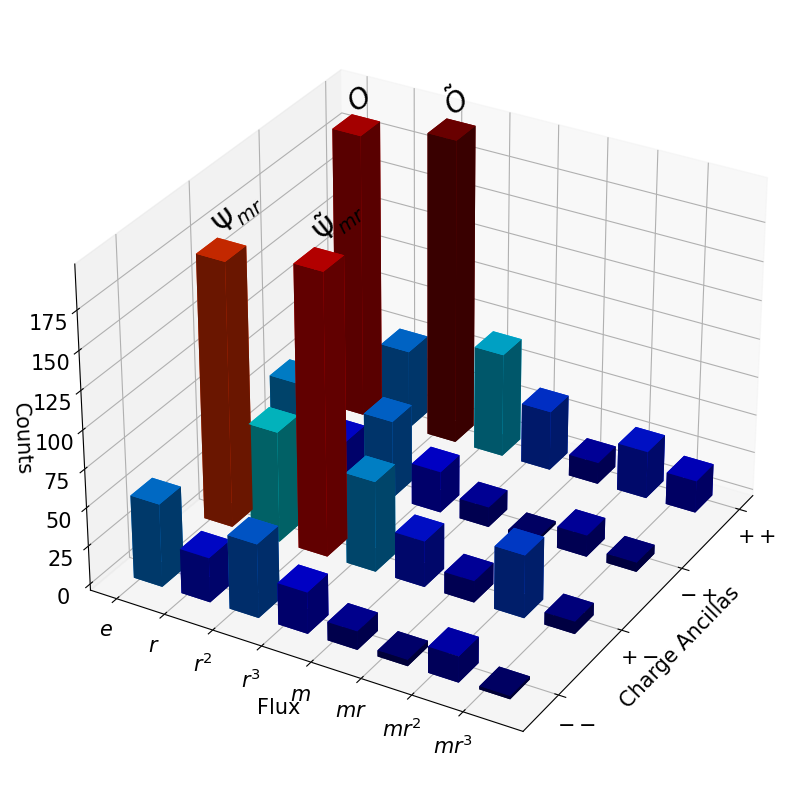

In [126]:
# setup the figure and axes
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(111, projection='3d')

plt.rc('font', size=15) 

cmap = cm.get_cmap('jet') # Get desired colormap - you can change this!
max_height = np.max(z)   # get range of colorbars so we can normalize
min_height = np.min(z)
# scale each z to [0,1], and get their rgb values
rgba = [cmap((k-min_height)/max_height) for k in z]

ax1.bar3d(x, y, bottom, width, depth, z, color=rgba)
#surf = ax1.plot_surface(np.array(x).reshape(4,8), np.array(y).reshape(4,8), z.reshape(4,8), cmap=cm.coolwarm, linewidth=0, antialiased=False)

ax1.set_xlabel('Charge Ancillas')
ax1.set_ylabel('Flux')
ax1.set_zlabel('Counts')

ax1.set_xticks(charge_mmt_res_num)
ax1.set_xticklabels(charge_mmt_res)
ax1.set_yticks(g_lab_num)
ax1.set_yticklabels(g_lab)

ax1.text(0,0-0.2,186, r'$O$', (1,0,0), size= 20)
ax1.text(0,2-0.2,199, r'$\tilde{O}$', (1,0,0), size= 20)
ax1.text(2,0-0.2,172, r'$\Psi_{mr}$', (1,0,0), size= 20)
ax1.text(2,2-0.2,183, r'$\tilde{\Psi}_{mr}$', (1,0,0), size= 20)
#ax1.text(1,0-0.15,55, r'$X$', (1,1,0), size= 20)

ax1.view_init(elev=30, azim=30)
plt.savefig('fusion_res.png', dpi=300)
plt.show()



In [ ]:
[[69. 41. 68. 41. 21. 13. 30. 12.]
 [42. 27. 39. 34. 21.  6. 17.  7.]
 [75. 31. 81. 40. 14.  9. 27.  8.]
 [46. 24. 40. 21. 17. 10. 12.  5.]]

 '10k runs'

 [[62. 34. 57. 44. 20. 13. 24.  6.]
 [40. 23. 45. 24. 12.  5. 12.  6.]
 [70. 29. 79. 40. 24.  7. 20. 10.]
 [38. 22. 35. 27. 15.  5.  7.  8.]]

 '10k runs'

 [[88. 38. 65. 30. 32. 19. 27. 11.]
 [39. 25. 30. 18. 16. 11. 16.  6.]
 [69. 37. 71. 40. 19. 17. 20. 14.]
 [38. 26. 39. 22. 13.  6.  7.  5.]]

 '10k runs'